In [1]:
from Learning_Agent import *
from Clairvoyant_non_stationary import *
from CUSUM import *
from FIFO import *
from Non_Stationary_Class_1 import *
from Non_Stationary_Env import *
from UCB1_active import *
from UCB1_non_stationary_passive import *
import Functions as f
import Plots as p
import matplotlib.pyplot as plt

In [2]:
p1=[[0.6,0.4,0.3,0.2,0.1],
   [0.4,0.3,0.4,0.6,0.3],
   [0.1,0.7,0.4,0.3,0.4],
]

c1=(3,85,10000)

cum1=700


classes= Non_Stationary_Class_1(p1 ,c1 ,cum1,3)

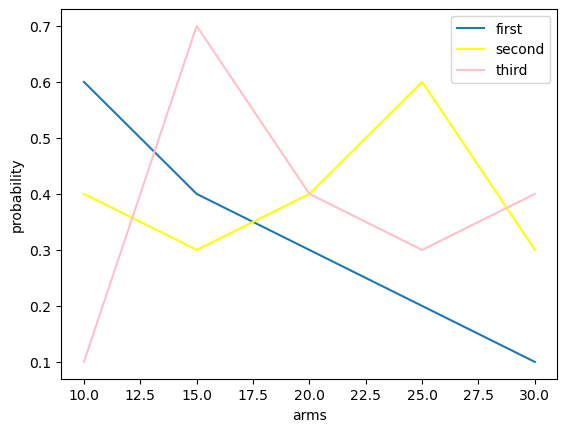

In [3]:
X=[10,15,20,25,30]
plt.plot(X,p1[0] , label="first")
plt.plot(X,p1[1] , c="yellow",label="second")
plt.plot(X,p1[2] , c="pink" , label="third")
plt.ylabel("probability")
plt.xlabel("arms")
plt.legend()

In [4]:
runs=20
T=365

cum_regret_ucb_multi=[]
cum_reward_ucb_multi=[]
istant_regret_ucb_multi=[]
istant_reward_ucb_multi=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)



for r in range(runs):
    # Creation of the UCB1
    ucb1=UCB1_non_stationary_passive(pricing_arms, 20)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,100,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_UCB=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_UCB=[0]
    regret_UCB=np.zeros(T)
    reward_UCB=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=ucb1.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
    
        ucb1.update(played_price,reward)
    
        cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
        reward_UCB[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_ucb_multi.append(cum_regret_UCB)
    cum_reward_ucb_multi.append(cum_reward_UCB)
    istant_regret_ucb_multi.append(regret_UCB)
    istant_reward_ucb_multi.append(reward_UCB)
    

In [6]:

runs=20
T=365

cum_regret_ucb_multi1=[]
cum_reward_ucb_multi1=[]
istant_regret_ucb_multi1=[]
istant_reward_ucb_multi1=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)
detector=CUSUM(pricing_arms,20,0.05,0.8)



for r in range(runs):
    # Creation of the UCB1
    ucb1_active=UCB1_active(pricing_arms,0.083)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,100,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_UCB=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_UCB=[0]
    regret_UCB=np.zeros(T)
    reward_UCB=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=ucb1_active.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        sample=reward[0]/reward[1]
       

        
        if(detector.update(played_price,sample)): 
            ucb1_active.change_detected(played_price)
            detector.reset(played_price)
            #print("trovato")
    
        ucb1_active.update(played_price,reward)
    
        cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
        reward_UCB[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_ucb_multi1.append(cum_regret_UCB)
    cum_reward_ucb_multi1.append(cum_reward_UCB)
    istant_regret_ucb_multi1.append(regret_UCB)
    istant_reward_ucb_multi1.append(reward_UCB)
    

trovato
trovato
trovato
trovato


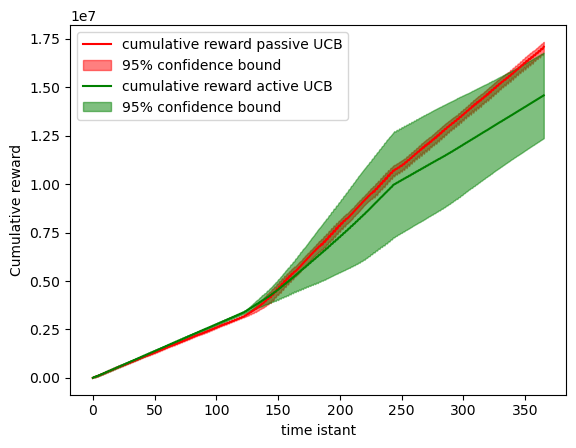

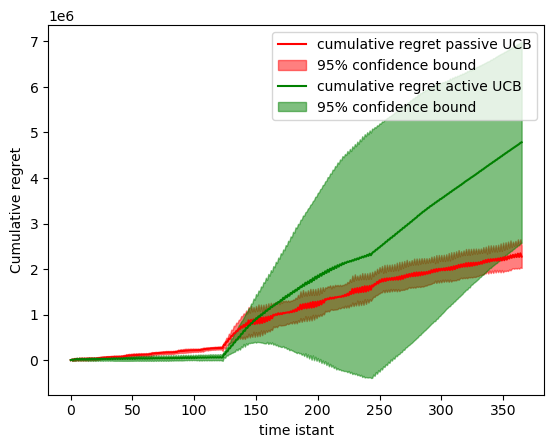

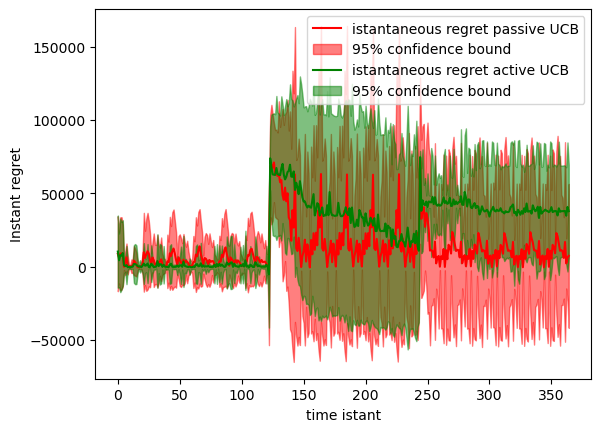

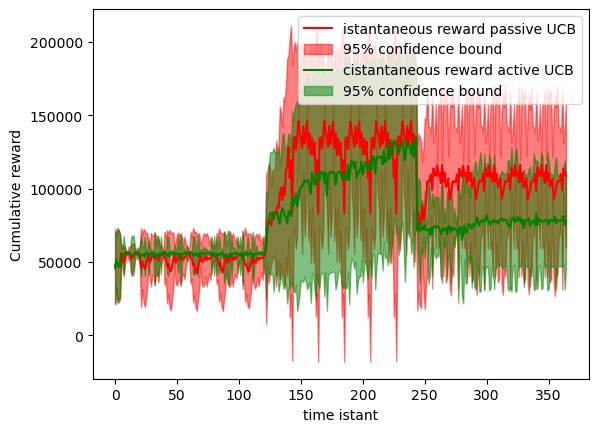

In [8]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_ucb_multi)
arr2=np.array(cum_reward_ucb_multi1)
p.plot_comparison(x, arr1,arr2,"cumulative reward passive UCB", "cumulative reward active UCB","Cumulative reward")

x=[i for i in range(T+1)]
arr1=np.array(cum_regret_ucb_multi)
arr2=np.array(cum_regret_ucb_multi1)
p.plot_comparison(x, arr1,arr2,"cumulative regret passive UCB", "cumulative regret active UCB","Cumulative regret")

x=[i for i in range(T)]
arr1=np.array(istant_regret_ucb_multi)
arr2=np.array(istant_regret_ucb_multi1)
p.plot_comparison(x, arr1,arr2,"istantaneous regret passive UCB", "istantaneous regret active UCB","Instant regret")

x=[i for i in range(T)]
arr1=np.array(istant_reward_ucb_multi)
arr2=np.array(istant_reward_ucb_multi1)
p.plot_comparison(x, arr1,arr2,"istantaneous reward passive UCB", "cistantaneous reward active UCB","Cumulative reward")



# SENSITIVITY ANALYSIS


SLIDING WINDOW

In [9]:
window_size=[10,20,30,40,50]
runs=5
T=365

cum_regret_window=[]
cum_reward_window=[]
istant_regret_window=[]
istant_reward_window=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)



for w in window_size:
    
    
    cum_regret_ucb_multi=[]
    cum_reward_ucb_multi=[]
    istant_regret_ucb_multi=[]
    istant_reward_ucb_multi=[]
    
    for r in range(runs):
       # Creation of the UCB1
        ucb1=UCB1_non_stationary_passive(pricing_arms, 20)
    
      # Creation of the enviroment
        env=Non_Stationary_Env(5,100,T,classes)
    
      # Creation of Clairvoyants
        pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
        advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
        cum_reward_UCB=[0]
        clairvoyant_cum_reward=[0]
        cum_regret_UCB=[0]
        regret_UCB=np.zeros(T)
        reward_UCB=np.zeros(T)
        istant_optimal_rew=np.zeros(T)

    
        for t in range(T):
        
        # Play the best pricing_arm
            played_price=ucb1.pull_arm()
         
        # Compute the optimal pricing arm using clairvoyant
            optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
            played_bid=advertising_clairv.optimal_arm(played_price)
            optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
 
        
            expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
            reward=env.round(played_price , played_bid)
        
    
            ucb1.update(played_price,reward)
    
            cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
            clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
            cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
            reward_UCB[t]=reward[2]
            istant_optimal_rew[t]=expected_optimal_rew
            regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
        cum_regret_ucb_multi.append(cum_regret_UCB)
        cum_reward_ucb_multi.append(cum_reward_UCB)
        istant_regret_ucb_multi.append(regret_UCB)
        istant_reward_ucb_multi.append(reward_UCB)
        
    cum_regret_window.append(cum_regret_ucb_multi)
    cum_reward_window.append(cum_reward_ucb_multi)
    istant_regret_window.append(istant_regret_ucb_multi)
    istant_reward_window.append(istant_reward_ucb_multi)
    

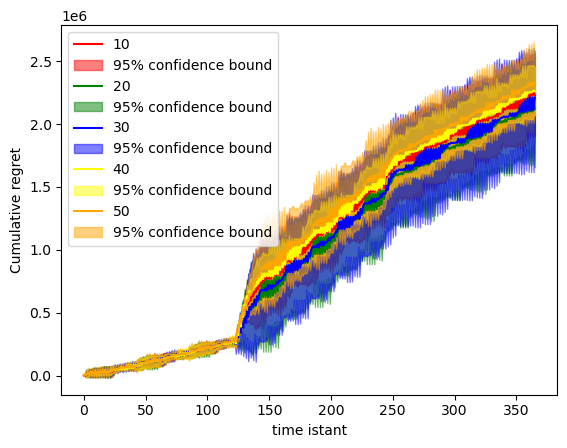

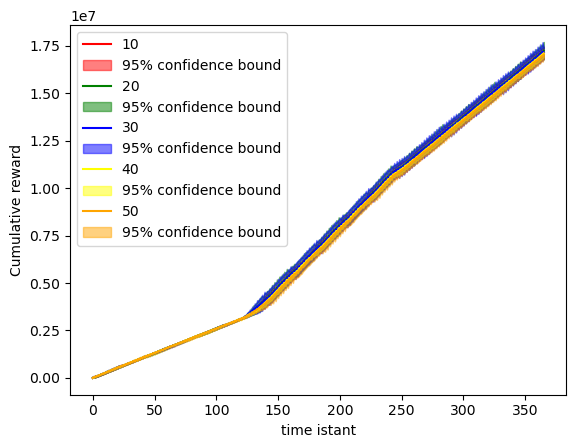

In [11]:
x=[i for i in range(T+1)]
arr1=np.array(cum_regret_window[0])
arr2=np.array(cum_regret_window[1])
arr3=np.array(cum_regret_window[2])
arr4=np.array(cum_regret_window[3])
arr5=np.array(cum_regret_window[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"10", "20" , "30" , "40" , "50","Cumulative regret")

x=[i for i in range(T+1)]
arr1=np.array(cum_reward_window[0])
arr2=np.array(cum_reward_window[1])
arr3=np.array(cum_reward_window[2])
arr4=np.array(cum_reward_window[3])
arr5=np.array(cum_reward_window[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"10", "20" , "30" , "40" , "50","Cumulative reward")

# Active

In [12]:
M=[10,20,30,40,50]


runs=5
T=365

cum_regret_M=[]
cum_reward_M=[]
istant_regret_M=[]
istant_reward_M=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)



for i in M:
    
    detector=CUSUM(pricing_arms,i,0.08,1)

    
    
    cum_regret_ucb_multi=[]
    cum_reward_ucb_multi=[]
    istant_regret_ucb_multi=[]
    istant_reward_ucb_multi=[]
    
    for r in range(runs):
       # Creation of the UCB1
        ucb1=UCB1_active(pricing_arms,0.05)
    
      # Creation of the enviroment
        env=Non_Stationary_Env(5,100,T,classes)
    
      # Creation of Clairvoyants
        pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
        advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
        cum_reward_UCB=[0]
        clairvoyant_cum_reward=[0]
        cum_regret_UCB=[0]
        regret_UCB=np.zeros(T)
        reward_UCB=np.zeros(T)
        istant_optimal_rew=np.zeros(T)

    
        for t in range(T):
        
        # Play the best pricing_arm
            played_price=ucb1.pull_arm()
         
        # Compute the optimal pricing arm using clairvoyant
            optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
            played_bid=advertising_clairv.optimal_arm(played_price)
            optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
            #print(t,played_price , optimal_price)
            # Collect rewards
        
            expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
            reward=env.round(played_price , played_bid)
            sample=reward[0]/reward[1]
       

        
            if(detector.update(played_price,sample)): 
                ucb1.change_detected(played_price)
                detector.reset(played_price)
        
    
            ucb1.update(played_price,reward)
    
            cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
            clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
            cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
            reward_UCB[t]=reward[2]
            istant_optimal_rew[t]=expected_optimal_rew
            regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
        cum_regret_ucb_multi.append(cum_regret_UCB)
        cum_reward_ucb_multi.append(cum_reward_UCB)
        istant_regret_ucb_multi.append(regret_UCB)
        istant_reward_ucb_multi.append(reward_UCB)
        
    cum_regret_M.append(cum_regret_ucb_multi)
    cum_reward_M.append(cum_reward_ucb_multi)
    istant_regret_M.append(istant_regret_ucb_multi)
    istant_reward_M.append(istant_reward_ucb_multi)
    

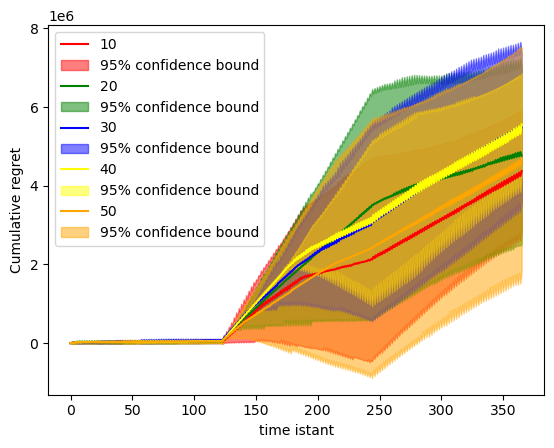

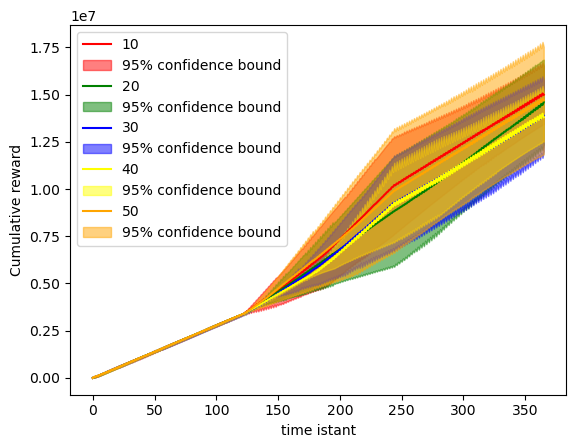

In [14]:
x=[i for i in range(T+1)]
arr1=np.array(cum_regret_M[0])
arr2=np.array(cum_regret_M[1])
arr3=np.array(cum_regret_M[2])
arr4=np.array(cum_regret_M[3])
arr5=np.array(cum_regret_M[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"10", "20" , "30" , "40" , "50","Cumulative regret")

x=[i for i in range(T+1)]
arr1=np.array(cum_reward_M[0])
arr2=np.array(cum_reward_M[1])
arr3=np.array(cum_reward_M[2])
arr4=np.array(cum_reward_M[3])
arr5=np.array(cum_reward_M[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"10", "20" , "30" , "40" , "50","Cumulative reward")



In [15]:
eps=[0.02,0.05,0.08,0.1,0.12]


runs=5
T=365

cum_regret=[]
cum_reward=[]
istant_regret=[]
istant_reward=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)



for i in eps:
    
    detector=CUSUM(pricing_arms,20,i,1)

    
    
    cum_regret_ucb_multi=[]
    cum_reward_ucb_multi=[]
    istant_regret_ucb_multi=[]
    istant_reward_ucb_multi=[]
    
    for r in range(runs):
       # Creation of the UCB1
        ucb1=UCB1_active(pricing_arms,0.05)
    
      # Creation of the enviroment
        env=Non_Stationary_Env(5,100,T,classes)
    
      # Creation of Clairvoyants
        pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
        advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
        cum_reward_UCB=[0]
        clairvoyant_cum_reward=[0]
        cum_regret_UCB=[0]
        regret_UCB=np.zeros(T)
        reward_UCB=np.zeros(T)
        istant_optimal_rew=np.zeros(T)

    
        for t in range(T):
        
        # Play the best pricing_arm
            played_price=ucb1.pull_arm()
         
        # Compute the optimal pricing arm using clairvoyant
            optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
            played_bid=advertising_clairv.optimal_arm(played_price)
            optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
            #print(t,played_price , optimal_price)
            # Collect rewards
        
            expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
            reward=env.round(played_price , played_bid)
            sample=reward[0]/reward[1]
       

        
            if(detector.update(played_price,sample)): 
                ucb1.change_detected(played_price)
                detector.reset(played_price)
        
    
            ucb1.update(played_price,reward)
    
            cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
            clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
            cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
            reward_UCB[t]=reward[2]
            istant_optimal_rew[t]=expected_optimal_rew
            regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
        cum_regret_ucb_multi.append(cum_regret_UCB)
        cum_reward_ucb_multi.append(cum_reward_UCB)
        istant_regret_ucb_multi.append(regret_UCB)
        istant_reward_ucb_multi.append(reward_UCB)
        
    cum_regret.append(cum_regret_ucb_multi)
    cum_reward.append(cum_reward_ucb_multi)
    istant_regret.append(istant_regret_ucb_multi)
    istant_reward.append(istant_reward_ucb_multi)
    

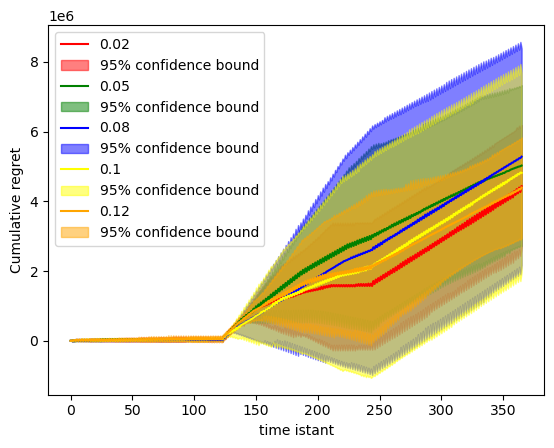

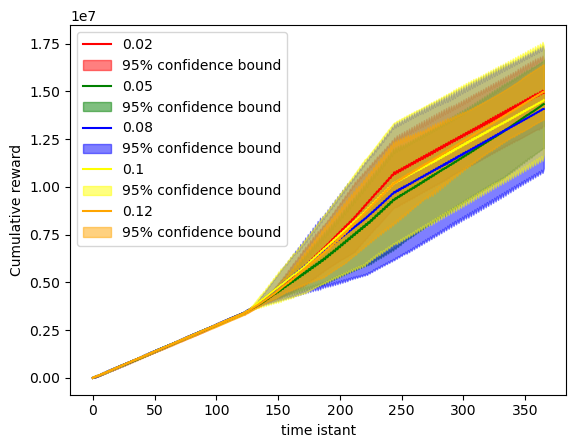

In [16]:
x=[i for i in range(T+1)]
arr1=np.array(cum_regret[0])
arr2=np.array(cum_regret[1])
arr3=np.array(cum_regret[2])
arr4=np.array(cum_regret[3])
arr5=np.array(cum_regret[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"0.02", "0.05" , "0.08" , "0.1" , "0.12","Cumulative regret")

x=[i for i in range(T+1)]
arr1=np.array(cum_reward[0])
arr2=np.array(cum_reward[1])
arr3=np.array(cum_reward[2])
arr4=np.array(cum_reward[3])
arr5=np.array(cum_reward[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"0.02", "0.05" , "0.08" , "0.1" , "0.12","Cumulative reward")


In [17]:
H=[0.8,1,1.2,1.5,1.8]


runs=5
T=365

cum_regret=[]
cum_reward=[]
istant_regret=[]
istant_reward=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(100,400,3)



for i in H:
    
    detector=CUSUM(pricing_arms,20,0.05,i)

    
    
    cum_regret_ucb_multi=[]
    cum_reward_ucb_multi=[]
    istant_regret_ucb_multi=[]
    istant_reward_ucb_multi=[]
    
    for r in range(runs):
       # Creation of the UCB1
        ucb1=UCB1_active(pricing_arms,0.05)
    
      # Creation of the enviroment
        env=Non_Stationary_Env(5,100,T,classes)
    
      # Creation of Clairvoyants
        pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
        advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
        cum_reward_UCB=[0]
        clairvoyant_cum_reward=[0]
        cum_regret_UCB=[0]
        regret_UCB=np.zeros(T)
        reward_UCB=np.zeros(T)
        istant_optimal_rew=np.zeros(T)

    
        for t in range(T):
        
        # Play the best pricing_arm
            played_price=ucb1.pull_arm()
         
        # Compute the optimal pricing arm using clairvoyant
            optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
            played_bid=advertising_clairv.optimal_arm(played_price)
            optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
            #print(t,played_price , optimal_price)
            # Collect rewards
        
            expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
            reward=env.round(played_price , played_bid)
            sample=reward[0]/reward[1]
       

        
            if(detector.update(played_price,sample)): 
                ucb1.change_detected(played_price)
                detector.reset(played_price)
        
    
            ucb1.update(played_price,reward)
    
            cum_reward_UCB.append(cum_reward_UCB[t-1]+reward[2])
            clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
            cum_regret_UCB.append(cum_regret_UCB[t-1]+(expected_optimal_rew-reward[2]))
            reward_UCB[t]=reward[2]
            istant_optimal_rew[t]=expected_optimal_rew
            regret_UCB[t]=expected_optimal_rew-reward[2]
        
        
        cum_regret_ucb_multi.append(cum_regret_UCB)
        cum_reward_ucb_multi.append(cum_reward_UCB)
        istant_regret_ucb_multi.append(regret_UCB)
        istant_reward_ucb_multi.append(reward_UCB)
        
    cum_regret.append(cum_regret_ucb_multi)
    cum_reward.append(cum_reward_ucb_multi)
    istant_regret.append(istant_regret_ucb_multi)
    istant_reward.append(istant_reward_ucb_multi)
    

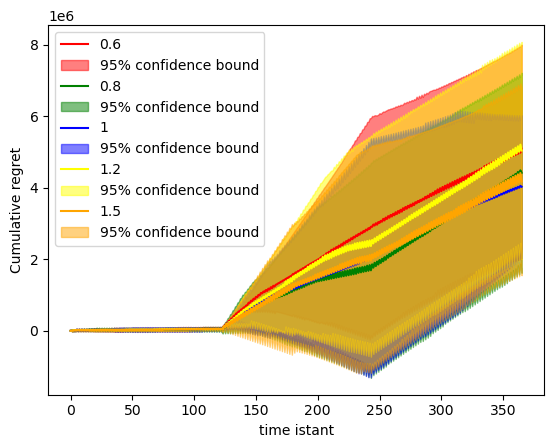

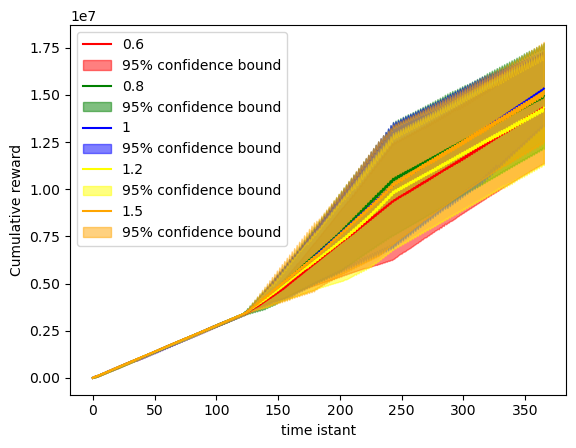

In [18]:
x=[i for i in range(T+1)]
arr1=np.array(cum_regret[0])
arr2=np.array(cum_regret[1])
arr3=np.array(cum_regret[2])
arr4=np.array(cum_regret[3])
arr5=np.array(cum_regret[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"0.6", "0.8" , "1" , "1.2" , "1.5","Cumulative regret")

x=[i for i in range(T+1)]
arr1=np.array(cum_reward[0])
arr2=np.array(cum_reward[1])
arr3=np.array(cum_reward[2])
arr4=np.array(cum_reward[3])
arr5=np.array(cum_reward[4])
p.plot_comparison_multi(x, arr1,arr2,arr3,arr4,arr5,"0.6", "0.8" , "1" , "1.2" , "1.5","Cumulative reward")
